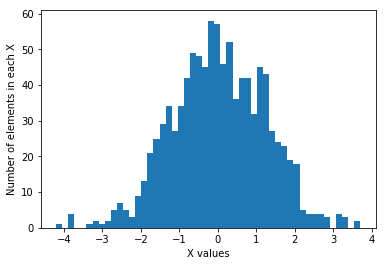

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline
number_of_sums = 1000
number_of_randoms = 10
X1 = np.zeros((number_of_sums, 1))
for i in range(number_of_sums):
  X1[i,0] = np.sum(np.random.rand(number_of_randoms,1)) - np.sum(np.random.rand(number_of_randoms,1))
plt.hist(X1, 50)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()

# 1 Законы статистики к данным

1. Для применения законов статистики требуется взять достаточно большую выборку, поскольку в соответсвие с "Центральной предельной теоремой" при достаточно боьшом объеме данных значения распределяются нормально.
2. В коде использовано 1000 наборов данных состоящих из сумм случайных элементов

# 2-3 Матрица ковариаций для графика?

[[1.         0.        ]
 [0.98       0.19899749]]


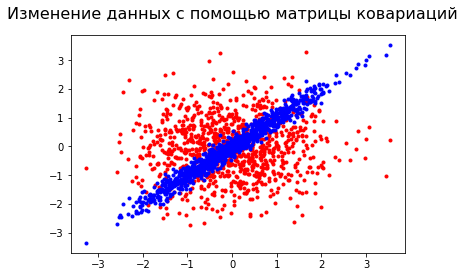

In [3]:
import numpy.linalg as la
n = 1000
C = [[1,0.98],[0.98,1]]
A = la.cholesky(C)
X = np.random.randn(n,2)
Y = np.dot(A,X.T)

plt.suptitle('Изменение данных с помощью матрицы ковариаций', fontsize=16)  
plt.plot(X[:,0], X[:,1], 'r.')
plt.plot(Y[0,:], Y[1,:], 'b.')
print(A)

Матрица ковариаций:

In [4]:
C = [[1,0.98],[0.98,1]]

# 4-5 Разброс данных

In [5]:
import math
i = 45
theta = i
u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
yp = np.transpose(Y)*u
var_empirical = np.var(yp)
var_theoretical = np.transpose(u)*C*u
print('генерация данных: ', var_empirical)
print('теоретический подсчет: ', var_theoretical)

генерация данных:  1.9609257117515586
теоретический подсчет:  [[1.87611673]]


Значения примерно равны -> выборка достточно большая

# 6 Вариация в зависимости от собственного вектора

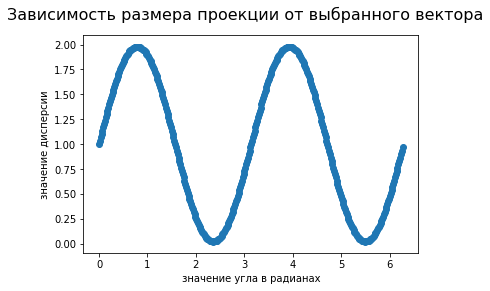

In [6]:
degrees360 = [2*math.pi/360*i for i in range(360)]
variances = []
for i in degrees360:
    theta = i
    u = np.matrix('{}; {}'.format(math.sin(theta), math.cos(theta)))
    yp = np.transpose(Y)*u
    var_empirical = np.var(yp)
    var_theoretical = np.transpose(u)*C*u
    variances.append(var_theoretical)

plt.suptitle('Зависимость размера проекции от выбранного вектора', fontsize=16)    
plt.xlabel('значение угла в радианах')
plt.ylabel('значение дисперсии')
plt.scatter(degrees360, variances)
plt.show()

# 7 Построить корреляцию

In [7]:
import io
import requests
url = "http://yustiks.ru/avocado.csv"
df = pd.read_csv(url)
df[:3]

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


          0         1
0  0.001026  0.000046
1  0.000877  0.000030
2  0.001890  0.000035
3  0.001262  0.000050
4  0.000815  0.000041


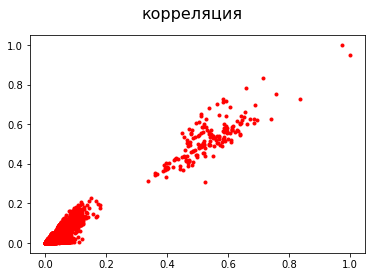

In [11]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))

np_scaled = min_max_scaler.fit_transform(df[['Total Volume', '4046']])
df_norm = pd.DataFrame(np_scaled)
print(df_norm[:5])

volume = df_norm[0]
volume4046 = df_norm[1]
plt.suptitle('корреляция', fontsize=16) 
plt.plot(volume, volume4046, 'r.')
plt.show()


# 9 Матрица ковариаций

1.7000000000000002 [0.70710678 0.70710678]


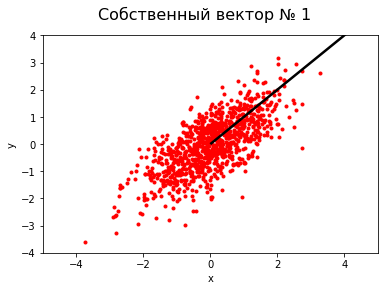

0.30000000000000016 [-0.70710678  0.70710678]


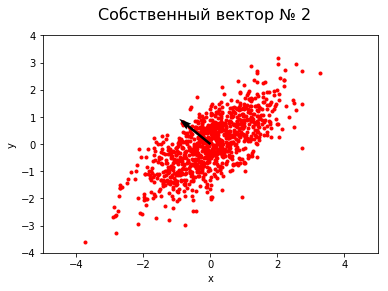

In [12]:
import numpy.linalg as la
n=1000
Cb = [[1,0.7],[0.7,1]]
Ab = la.cholesky(Cb)
Xb = np.random.randn(n,2)
Yb = np.dot(Ab,Xb.T)
w,v = la.eig(Cb)

for i in range(len(w)):
    plt.suptitle('Собственный вектор № '+ str(i+1), fontsize=16)    
    plt.plot(Yb[0,:], Yb[1,:], 'r.', zorder=1)
    plt.axis([-5,5,-4,4])
    print(w[i], v[:,i])
    plt.quiver(0,0, v[:,i][0], v[:,i][1], angles = 'xy', scale=(2.5/w[i]), zorder=2)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.show()

# 10 Линейное преобразование

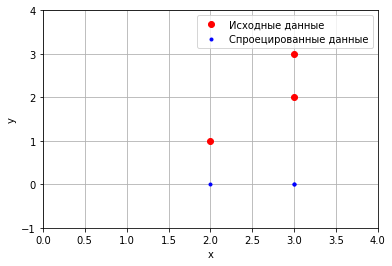

In [13]:
Xc = np.array([[2,1],[3,2],[3,3]])
P = np.array([[1,0],[0,0]]) # проекция на ось x
Xp = np.dot(Xc,P)

plt.plot(Xc[:,0], Xc[:,1], 'ro', label="Исходные данные")
plt.plot(Xp[:,0], Xp[:,1], 'b.', label="Спроецированные данные")
plt.axis([0,4,-1,4])
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()

# 11 Теория вероятности

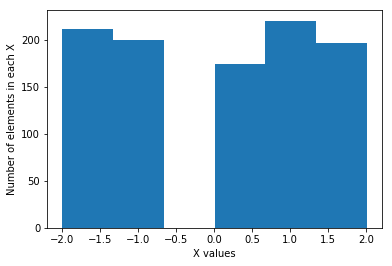

In [20]:
number_dice_roll = 1000
X1 = np.zeros((number_dice_roll, 1))
for i in range(number_dice_roll):
  X1[i,0] = np.random.randint(1,6)
plt.hist(X1, 6)
plt.xlabel('X values')
plt.ylabel('Number of elements in each X')
plt.show()